## 0, Load Dependencies  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 2, Load Boston Housing Data

In [3]:
# Load the Boston Housing dataset
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(data_url)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 3, Prepare Data for modeling

In [4]:
# Split the dataset into features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [5]:
# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)


In [6]:
# Add a column of ones for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))


## 4, Define Ridge Regression Function

In [7]:
# Define the Ridge Regression function
def ridge_regression(X, y, alpha):
    I = np.identity(X.shape[1])
    I[0, 0] = 0
    XtX = np.dot(X.T, X)
    XtX_alphaI = XtX + alpha * I
    XtY = np.dot(X.T, y)
    w = np.dot(np.linalg.inv(XtX_alphaI), XtY)
    return w


## 5, Fitting the model

### Split the data into training and testing.  
Almost 80% and 20%

In [8]:
# Split the data into training and testing sets
np.random.seed(1234)
indices = np.random.permutation(X.shape[0])
train_indices, test_indices = indices[:400], indices[400:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


Ridge Regression is a regularization technique used in linear regression to prevent overfitting by adding a penalty term to the cost function. This penalty term is controlled by a regularization parameter, alpha $\alpha$, which determines the strength of the regularization. Ridge Regression is especially useful when the number of features is much larger than the number of samples or when the features are highly correlated.

In [9]:
# Fit a Ridge regression model to the training data
alpha = 0.1
w = ridge_regression(X_train, y_train, alpha)


In [10]:
# Compute the predictions on the test data
y_pred = np.dot(X_test, w)


## 6, Evaluate the Model

In [11]:
# Compute the mean squared error
mse = np.mean((y_test - y_pred) ** 2)
# Print the mean squared error
print('Mean Squared Error:', mse)


Mean Squared Error: 0.4995677186325954


I will plot two plots here:  
The first plot shows the coefficients(weights) of the Ridge Regression model, and the second plot shows the predicted vs actual values. These plots help visualize the performance of the model.

<ipython-input-12-e8ce9720a12a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns[:-1], rotation=90)


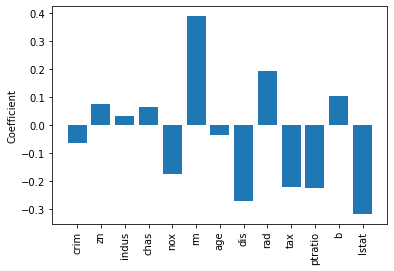

In [12]:
# Plot the coefficients of the model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(data.columns[:-1], w[1:])
ax.set_xticklabels(data.columns[:-1], rotation=90)
ax.set_ylabel('Coefficient')
plt.show()


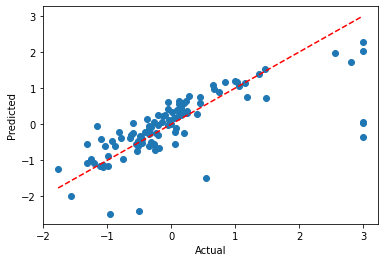

In [13]:
# Plot the predicted vs actual values
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test, y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

